<a href="https://colab.research.google.com/github/wurifah/portofolio/blob/main/credit_loan_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("credit_loan_feature_engineering.xlsx")
df

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,status
0,0,34362.5,36 months,24.74,1006.47,G,< 1 year,RENT,147500.0,small_business,good
1,1,34362.5,60 months,24.74,1006.47,G,3 years,MORTGAGE,147500.0,small_business,good
2,2,34362.5,60 months,24.74,1006.47,G,10+ years,MORTGAGE,147500.0,debt_consolidation,good
3,3,34362.5,36 months,24.74,1006.47,F,10+ years,RENT,147500.0,small_business,good
4,4,34362.5,60 months,24.74,1006.47,F,10+ years,MORTGAGE,147500.0,debt_consolidation,good
...,...,...,...,...,...,...,...,...,...,...,...
242054,242054,6000.0,60 months,23.40,170.53,E,10+ years,MORTGAGE,45600.0,medical,bad
242055,242055,15000.0,36 months,16.99,534.72,D,10+ years,RENT,50000.0,debt_consolidation,bad
242056,242056,8525.0,60 months,18.25,217.65,D,5 years,MORTGAGE,37536.0,medical,bad
242057,242057,18000.0,36 months,7.90,563.23,A,3 years,RENT,90000.0,debt_consolidation,bad


# Preprocessing

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242059 entries, 0 to 242058
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       242059 non-null  float64
 1   term            242059 non-null  object 
 2   int_rate        242059 non-null  float64
 3   installment     242059 non-null  float64
 4   grade           242059 non-null  object 
 5   emp_length      242059 non-null  object 
 6   home_ownership  242059 non-null  object 
 7   annual_inc      242059 non-null  float64
 8   purpose         242059 non-null  object 
 9   status          242059 non-null  object 
dtypes: float64(4), object(6)
memory usage: 18.5+ MB


## Mengubah kolom term menjadi tipe data float

In [7]:
'''pada kolom term, terdapat campuran antara data numerik dan data nominal dimana 
data tersebut terlihat akan mempengaruhi proses modeling. Maka dari itu kita ambil
data numeriknya saja dari kolom term dan menghapus data nominalnya
'''

df['term'] = df['term'].astype(str)
new_term = [item.replace(" months", "") for item in df['term']] # membuat kolom baru dari kolom term tanpa kata ' months'
df['new_term'] = new_term # memasukkan kolom baru ke dataframe
df['new_term'] = df['new_term'].astype(float) #mengubah data baru ke dalam bentuk integer

In [8]:
df.drop('term',axis=1,inplace=True) # menghapus kolom term yang sudah diperbarui

In [11]:
data =  df[['loan_amnt','new_term','int_rate','installment',
            'grade','emp_length','home_ownership','annual_inc','purpose','status']]

In [12]:
# Lalu mengganti nama with_annual_inc dengan annual_inc kembali
data.rename(columns={'new_term': 'term'}, inplace=True)
data

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,status
0,34362.5,36.0,24.74,1006.47,G,< 1 year,RENT,147500.0,small_business,good
1,34362.5,60.0,24.74,1006.47,G,3 years,MORTGAGE,147500.0,small_business,good
2,34362.5,60.0,24.74,1006.47,G,10+ years,MORTGAGE,147500.0,debt_consolidation,good
3,34362.5,36.0,24.74,1006.47,F,10+ years,RENT,147500.0,small_business,good
4,34362.5,60.0,24.74,1006.47,F,10+ years,MORTGAGE,147500.0,debt_consolidation,good
...,...,...,...,...,...,...,...,...,...,...
242054,6000.0,60.0,23.40,170.53,E,10+ years,MORTGAGE,45600.0,medical,bad
242055,15000.0,36.0,16.99,534.72,D,10+ years,RENT,50000.0,debt_consolidation,bad
242056,8525.0,60.0,18.25,217.65,D,5 years,MORTGAGE,37536.0,medical,bad
242057,18000.0,36.0,7.90,563.23,A,3 years,RENT,90000.0,debt_consolidation,bad


## Encoding data kategorik

In [13]:
before_grade = data['grade'].value_counts()
before_emp_length = data['emp_length'].value_counts()
before_home_ownership = data['home_ownership'].value_counts()
before_purpose = data['purpose'].value_counts()
before_status = data['status'].value_counts()
print('Jumlah grade sebelum encoding: ', before_grade)
print('Jumlah emp_length sebelum encoding: ', before_emp_length)
print('Jumlah home_ownership sebelum encoding: ', before_home_ownership)
print('Jumlah purpose sebelum encoding: ', before_purpose)
print('Jumlah status sebelum encoding: ', before_status)

Jumlah grade sebelum encoding:  B    72920
C    61942
A    39676
D    39428
E    18528
F     7532
G     2033
Name: grade, dtype: int64
Jumlah emp_length sebelum encoding:  10+ years    81622
2 years      22642
< 1 year     20234
3 years      19680
5 years      17497
1 year       16280
4 years      15563
6 years      14496
7 years      13652
8 years      11257
9 years       9136
Name: emp_length, dtype: int64
Jumlah home_ownership sebelum encoding:  MORTGAGE    118837
RENT        102562
OWN          20432
OTHER          179
NONE            48
ANY              1
Name: home_ownership, dtype: int64
Jumlah purpose sebelum encoding:  debt_consolidation    141061
credit_card            48265
home_improvement       14084
other                  13847
major_purchase          6038
small_business          4843
car                     3521
medical                 2746
wedding                 2020
moving                  1915
house                   1555
vacation                1483
educational     

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['grade'] = encoder.fit_transform(data['grade'])
data['emp_length'] = encoder.fit_transform(data['emp_length'])
data['home_ownership'] = encoder.fit_transform(data['home_ownership'])
data['purpose'] = encoder.fit_transform(data['purpose'])
data['status'] = encoder.fit_transform(data['status'])

In [15]:
setelah_grade = data['grade'].value_counts()
setelah_emp_length = data['emp_length'].value_counts()
setelah_home_ownership = data['home_ownership'].value_counts()
setelah_purpose = data['purpose'].value_counts()
setelah_status = data['status'].value_counts()
print('Jumlah grade setelah encoding: ', setelah_grade)
print('Jumlah emp_length setelah encoding: ', setelah_emp_length)
print('Jumlah home_ownership setelah encoding: ', setelah_home_ownership)
print('Jumlah purpose setelah encoding: ', setelah_purpose)
print('Jumlah status setelah encoding: ', setelah_status)

Jumlah grade setelah encoding:  1    72920
2    61942
0    39676
3    39428
4    18528
5     7532
6     2033
Name: grade, dtype: int64
Jumlah emp_length setelah encoding:  1     81622
2     22642
10    20234
3     19680
5     17497
0     16280
4     15563
6     14496
7     13652
8     11257
9      9136
Name: emp_length, dtype: int64
Jumlah home_ownership setelah encoding:  1    118837
5    102562
4     20432
3       179
2        48
0         1
Name: home_ownership, dtype: int64
Jumlah purpose setelah encoding:  2     141061
1      48265
4      14084
9      13847
6       6038
11      4843
0       3521
7       2746
13      2020
8       1915
5       1555
12      1483
3        422
10       259
Name: purpose, dtype: int64
Jumlah status setelah encoding:  1    186727
0     55332
Name: status, dtype: int64


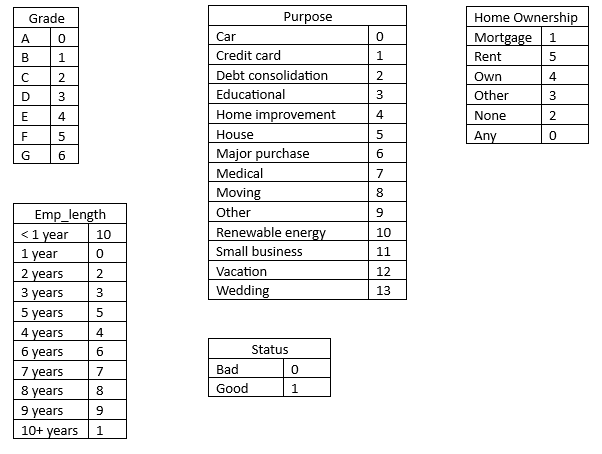

# Modeling

##Separating Train and Test

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold 


In [18]:
X = data.drop('status',axis=1)
y = data['status']

train_ratio = 0.8  # train set 80%
test_ratio = 0.2  # test set 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

In [19]:
print(f"Train features: {X_train.shape}")
print(f"Train target: {y_train.shape}")
print(f"Test features: {X_test.shape}")
print(f"Test target: {y_test.shape}")

Train features: (193647, 9)
Train target: (193647,)
Test features: (48412, 9)
Test target: (48412,)


In [20]:
y_train.value_counts()

1    149503
0     44144
Name: status, dtype: int64

karena terdapat adanya imbalance class, kita akan melakukan oversampling pada data training dengan metode SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
# oversampling
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)

# distribution target after oversampling
pd.Series(y_train_over).value_counts()

1    149503
0    149503
Name: status, dtype: int64

In [22]:
# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
nb = GaussianNB()

# Assign model to a list
models = [dtc, rfc, knn, logreg, nb]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

## Cross Validation

In [23]:
# Cross validation for each model 
dtc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5

In [24]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, knn_score, logreg_score, nb_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
DecisionTreeClassifier,0.629493,0.621726,0.674667,0.664918,0.620830
RandomForestClassifier,0.741386,0.714575,0.750413,0.749298,0.719940
KNeighborsClassifier,0.738288,0.737751,0.730273,0.734838,0.732829
LogisticRegression,0.747604,0.767330,0.766422,0.773321,0.770982
GaussianNB,0.711786,0.752128,0.750888,0.774064,0.716759


In [25]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

In [26]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

In [27]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

,score_mean,score_std
LogisticRegression,0.765132,0.009110
GaussianNB,0.741125,0.023477
RandomForestClassifier,0.735122,0.015011
KNeighborsClassifier,0.734796,0.003008
DecisionTreeClassifier,0.642327,0.022836


Pada eksperimen di atas, didapatkan nilai rata-rata akurasi dan standar deviasi setiap k_fold validation. Logistic regression memiliki performa terbaik dengan nilai rata-rata akurasi mencapai 76.51% dengan standar deviasi 0.009

# Fit and Evaluation

Selain dengan menggunakan cross validation, dilakukan pula uji nilai akurasi pada training dan testing yang bertujuan untuk melihat akurasi saat data training dan testing dan perbedaannya

In [28]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train_over, y_train_over)
    # accuracy for training set
    train_score.append(model.score(X_train_over, y_train_over))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

In [29]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

,train score,test score,difference
DecisionTreeClassifier,0.997505,0.662398,0.335107
RandomForestClassifier,0.997502,0.714761,0.282741
KNeighborsClassifier,0.815830,0.607845,0.207985
GaussianNB,0.629288,0.648434,0.019146
LogisticRegression,0.594610,0.535157,0.059454


Terlihat bahwa model Gaussian NB memiliki nilai perbedaan akurasi terkecil yaitu sekitar 1,91%, diikuti oleh model Logistic Regression dengan nilai sekitar 5,94%. Decision tree memiliki nilai akurasi yang sangat tinggi pada data training yaitu sekitar 99.75% sedangkan pada data testing nilai akurasinya berkurang menjadi sekitar 66.23%

## Cross Validation for Some Metrics

Selanjutnya dilakukan cross validation untuk mengukur performa model dengan beberapa metrik yaitu accuracy, precision, recaal dan f1-score

In [30]:
# Cross validation for each model
dtc_score = cross_validate(models[0], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[2], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[3], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[4], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7

In [31]:
cv_result = [dtc_score, rfc_score, knn_score, logreg_score, nb_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy','test_precision'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,LogisticRegression,2.589415,0.077725,0.765132,0.776366,0.977336,0.865079
1,GaussianNB,0.121840,0.109981,0.741125,0.811604,0.866115,0.837047
2,RandomForestClassifier,51.113622,2.185909,0.736539,0.786761,0.903426,0.840858
3,KNeighborsClassifier,0.661628,3.373562,0.734796,0.783563,0.906709,0.840612
4,DecisionTreeClassifier,1.936421,0.111274,0.642926,0.787246,0.736171,0.760252


Dari hasil diatas, LogisticRegression memiliki nilai akurasi dan recall yang paling tinggi dari keseluruhan model. Pada kasus ini selain nilai akurasi yang diperhitungkan, recall juga akan diperhitungkan karena model yang baik adalah model yang dapat mengklasifikasi lebih banyak False Positive(FP) daripada False Negative (FN). FP pada kasus ini yaitu model memprediksi peminjam bad borrower, tetapi sebenarnya tidak. Maka FP lebih baik daripada FN. FN yaitu model memprediksi peminjam merupakan good borrower tetapi sebenarnya bad, dan hal ini dapat menyebabkan semakin banyak peminjam yang memiliki predikat bad borrower



> Dari keseluruhan proses diatas, maka dipilih model Logistic Regression karena memiliki nilai accuracy dan recall yang cukup tinggi





# Logistic Regression

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lr_pred = logreg.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((logreg.score(X_train, y_train) * 100), 2)
test_score_def = round((logreg.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, lr_pred)) * 100, 2)
recall_score_def = round((recall_score(y_test, lr_pred)) * 100, 2)
f1_def = round(f1_score(y_test, lr_pred)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 76.79%
Test Accuracy : 76.43%
Precision Score : 77.32%
Recall Score : 98.14%
F1 Score : 86.49%


[[  470 10718]
 [  694 36530]]


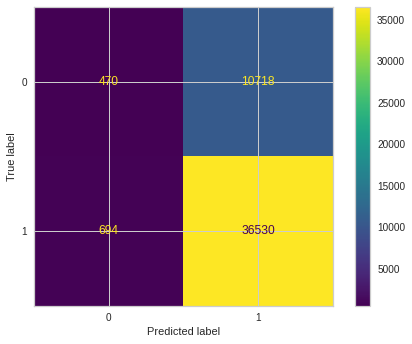

In [34]:
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)
print(cm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [35]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.40      0.04      0.08     11188
           1       0.77      0.98      0.86     37224

    accuracy                           0.76     48412
   macro avg       0.59      0.51      0.47     48412
weighted avg       0.69      0.76      0.68     48412



Dari hasil thresholds adjusment dapat dilihat bahwa hasilnya terdapat  37.224 berhasil diklasifikasi sebagai good borrower (1) dan sebanyak 11.188 diklasifikasi sebagai bad borrower (0)

## Precision Recall and ROC Curve

In [44]:
# Precision Recall Curve
lr_pred = logreg.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, lr_pred, pos_label=logreg.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

In [45]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, lr_pred, pos_label=logreg.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

ROC AUC Score is : 0.6615518820593217


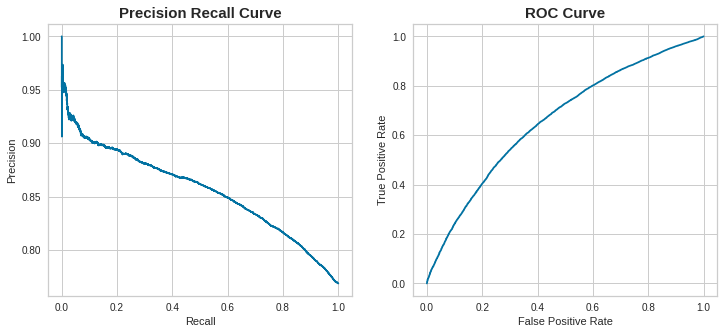

In [46]:
# roc auc score
auc_score = roc_auc_score(y_test, lr_pred)
print(f'ROC AUC Score is : {auc_score}')

# Plotting Precision Recall and ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
ax1.set_title('Precision Recall Curve', fontsize=15, fontweight='bold')
ax2.set_title('ROC Curve', fontsize=15, fontweight='bold')
plt.show()

In [48]:
import pickle

filename = 'lr_model.sav'
pickle.dump(logreg, open(filename, 'wb'))